# Projekat 1 - Nadgledano učenje (regresija)

## 1. Priprema podataka

Importovanje potrebnih biblioteka i učitavanje dataset-a:

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataframe = pd.read_csv("C:/Users/38164/Master studije/Masinsko ucenje/Projekat 1/parkinsons_updrs.data")
dataframe

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


---------

**Informacije o dataset-u i tipovima atributa**

Dataset sadrži podatke o biomedicinskim karakteristikama glasova 42 pacijenta kojima je dijagnostifikovana Parkinsonova bolest. Merenje je vršeno u kućnim uslovima korišćenjem šest posebnih uređaja tokom šest meseci.

Dataset se sastoji od 22 atributa (kolona) i 5875 vrsta (opservacija). Svaka vrsta sadrži rezultate jednog merenja. Kolone sadrže informacije o broju pacijenta, godinama, polu, vremenskom intervalu od početka ispitivanja, motornom UPDRS (Unified Parkinson's disease rating scale), ukupnom UPDRS i 16 biomedicinskih karakteristika glasa (mere promene frekvencije i amplitude, odnos šuma i tonskih komponenti glasa, mere nelinearnosti, itd.).

Cilj ovog projekta je da se, na osnovu ovih mera/karakteristika, predvide UPDRS vrednosti pacijenta.

In [2]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

Svi atributi su numeričkog tipa (atribut pol je automatski kodiran vrednostima 0 i 1 za muški i ženski pol, respektivno.

---------

**Nedostajuće vrednosti i duplikati**

In [3]:
dataframe.isnull().sum()

subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

U dataset-u nema nedostajućih vrednosti, a po prirodi podataka (različita merenja za različite pacijente) nema ni duplikata, što se dodatno može pokazati na sledeći način:

In [5]:
dataframe.shape

(5875, 22)

In [6]:
dataframe.drop_duplicates().shape

(5875, 22)

---------------

## 2. Deskriptivna analiza podataka

In [9]:
dataframe.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


U prethodnoj tabeli možemo videti mere kvaliteta podataka i to: srednju vrednost, standardnu devijaciju, min i max vrednost, medijanu i 25. i 75. percentil.

----------------

**Distribucija podataka**

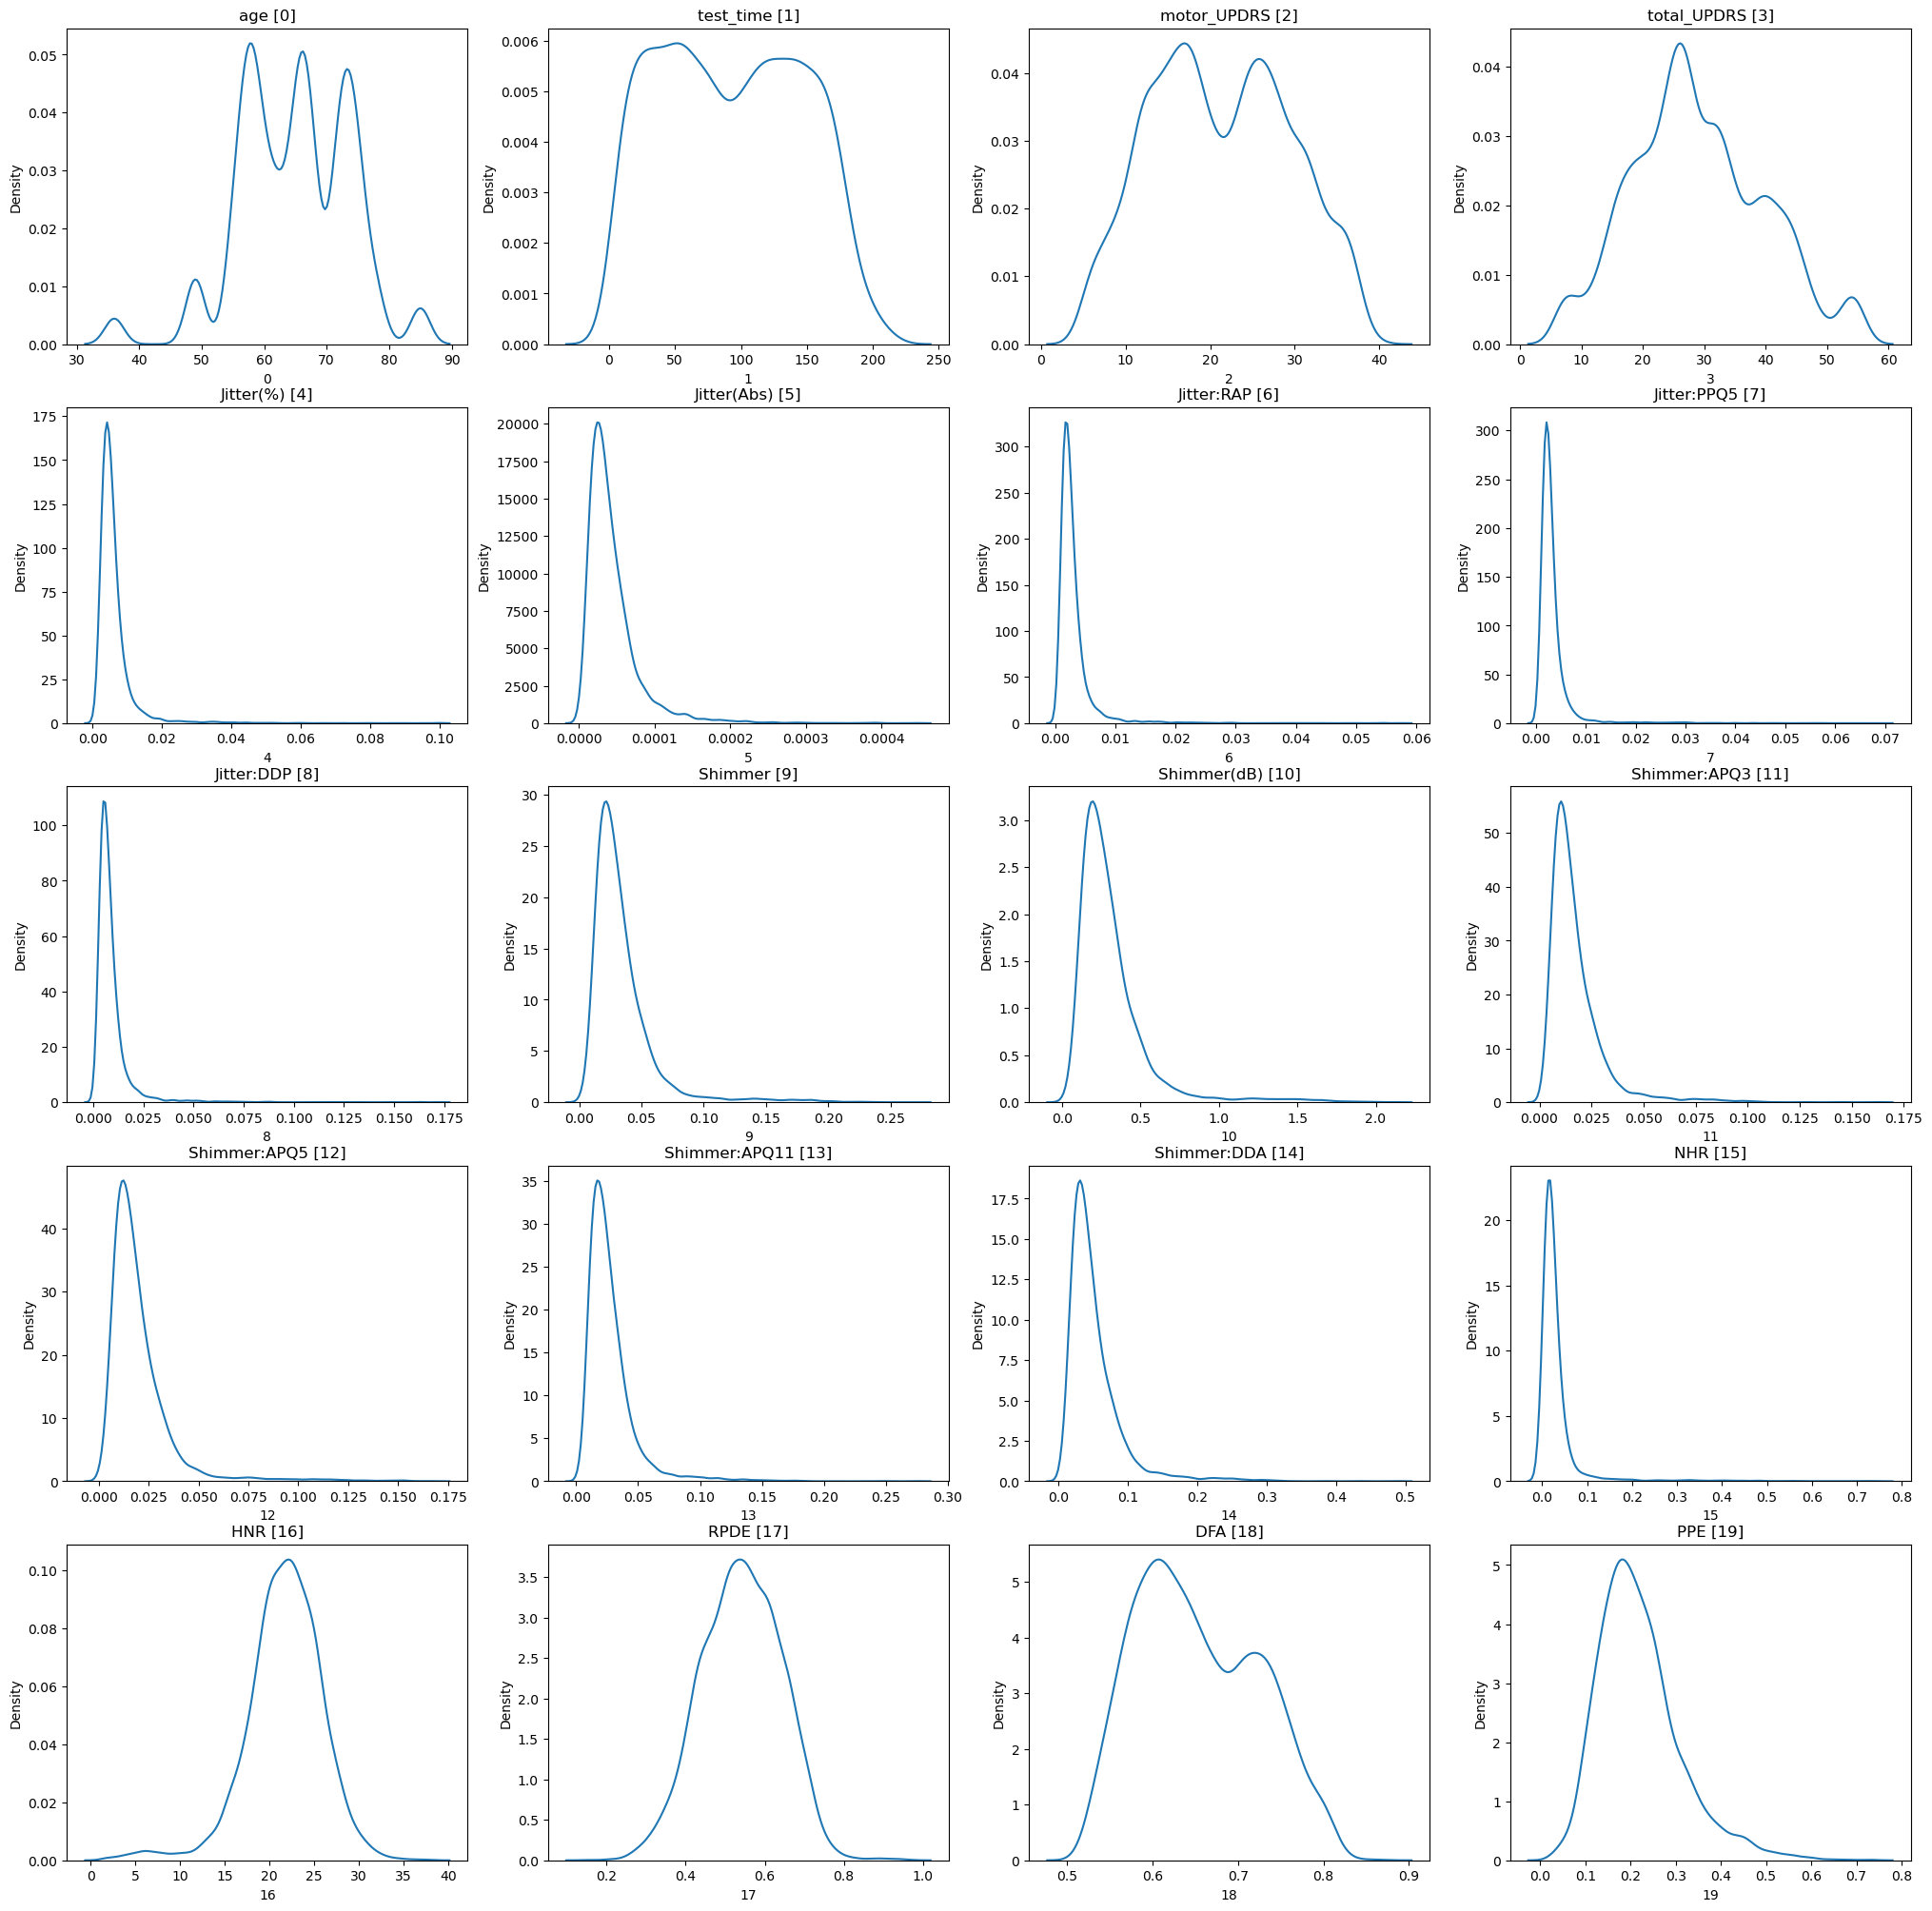

In [13]:
df = dataframe.drop(['subject#','sex'], axis=1)
potential_features_to_show = df.to_numpy()

mod_df = pd.DataFrame(potential_features_to_show)
fig, axs = plt.subplots(5,4, figsize=(25,25))
for i in range(5):
    for j in range(4):
        sns.kdeplot(mod_df[4*i+j], ax=axs[i][j])
        axs[i][j].set_title('{} [{}]'.format(df.columns[4*i+j],4*i+j))
plt.show()

Može se reći da su podaci dobro raspoređeni i da nema značajnog broja outlier-a (što se takođe može zaključiti upoređivanjem *mean* i *median* vrednosti iz prethodne tabele).

---------

**Korelacija parova atributa**

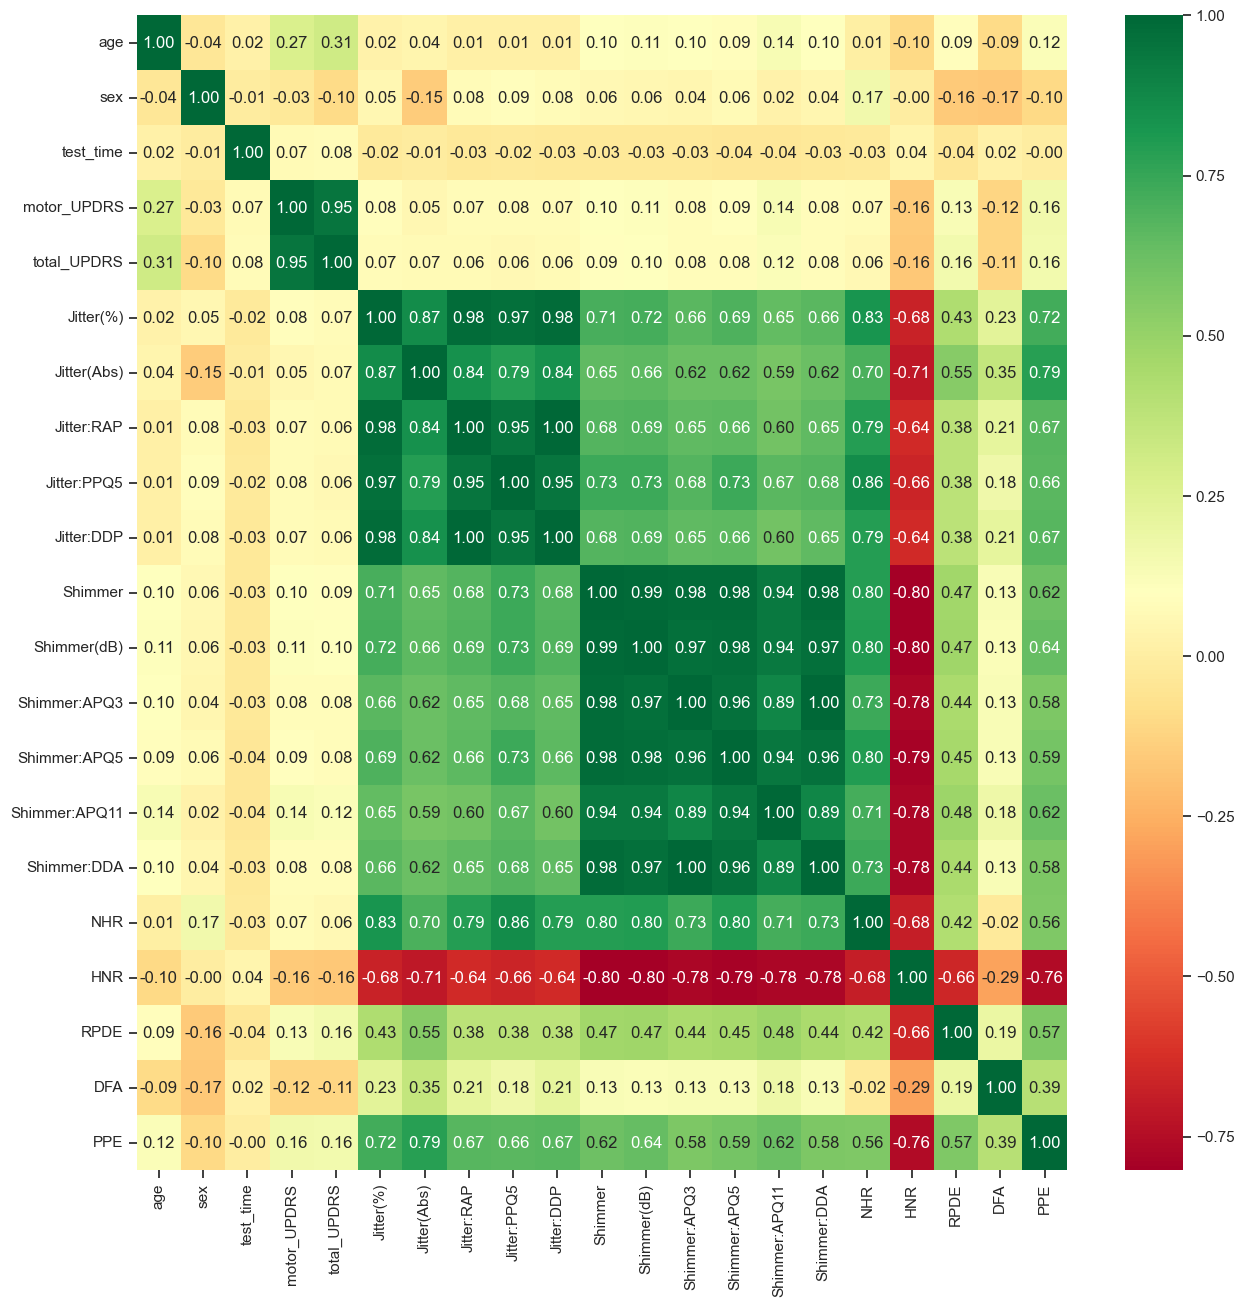

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(dataframe[dataframe.columns[1:]].corr(), annot=True, cmap='RdYlGn', fmt='.2f')
plt.show()

Na prethodnoj *heatmap*-i predstavljene su korelacije određenih parova atributa. Možemo zaključiti da ne postoji linearna zavisnost između target promenljivih *motor UPDRS* i *total UPDRS* sa nezavisnim promenljivima (potencijalnim fičerima). Takođe, možemo zaključiti da postoji jaka linearna zavisnost između određenih nezavisnih promenljivih (prvenstveno *Jitter-* i *Shimmer-* promenljivih), što se može iskoristiti za smanjenje dimenzionalnosti izbacivanjem visoko korelisanih fičera.

-----------

## 3. Regresija

**Priprema fičera**

Najpre se razdvajaju potencijalni fičeri i target promenljive za dalji proces obučavanja modela:

In [2]:
from sklearn.preprocessing import StandardScaler

potential_features_dataframe = dataframe.drop(['subject#', 'motor_UPDRS', 'total_UPDRS'], axis=1)
potential_features = potential_features_dataframe.to_numpy()
target_motor_UPDRS = dataframe['motor_UPDRS']
target_total_UPDRS = dataframe['total_UPDRS']
target = pd.concat([target_motor_UPDRS, target_total_UPDRS], axis=1).to_numpy() # za algoritme koji rade multi-target regresiju

scaler = StandardScaler()
standardized_features = scaler.fit_transform(potential_features)

Prvo će se modeli obučavati na svim potencijalnim fičerima, a kasnije će se vršiti selekcija boljih i upoređivanje dobijenih rezultata. Ukoliko neki model zahteva (ili je poželjnije koristiti) standardizovane fičere, koristiće se njihov standardizovan oblik. Takođe, porediće se rezultati sa i bez podele dataseta na train i test skup, tačnije korišćenja cross-validacije. 

Evaluacija modela biće vršena korišćenjem *r2*, *RMSE* (koren srednje kvadratne greške) i *MAE* (srednja apsolutna greška) mera.

In [3]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

scores = {}                      # za poredjenje skorova nakon modifikacija

------

**Selekcija fičera**

Atribut koji se u startu može odbaciti je ***subject#*** - identifikator pacijenta, jer on sigurno nikako ne utiče na vrednost UPDRS.

SelectKBest

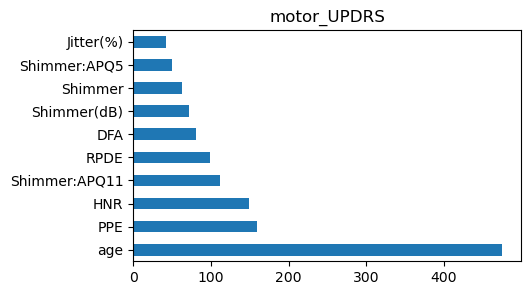

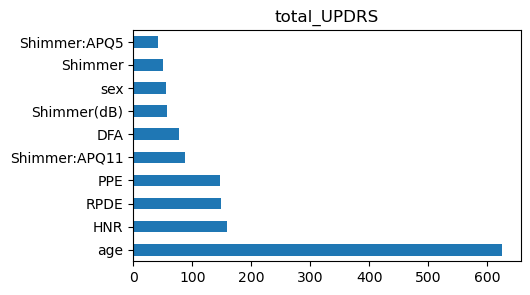

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

features = potential_features
fs_KB_motor = SelectKBest(score_func=f_regression, k=10)
features_KB_motor = fs_KB_motor.fit_transform(features, target_motor_UPDRS)
fs_KB_total = SelectKBest(score_func=f_regression, k=10)
features_KB_total = fs_KB_total.fit_transform(features, target_total_UPDRS)

plt.figure(figsize=(5,3))
motor_best_scores = pd.Series(fs_KB_motor.scores_, index=potential_features_dataframe.columns)
motor_best_scores.nlargest(10).plot(kind='barh')
plt.title('motor_UPDRS')
plt.show()

plt.figure(figsize=(5,3))
total_best_scores = pd.Series(fs_KB_total.scores_, index=potential_features_dataframe.columns)
total_best_scores.nlargest(10).plot(kind='barh')
plt.title('total_UPDRS')
plt.show()

scaler = StandardScaler()
standardized_KB_motor = scaler.fit_transform(features_KB_motor)
scaler = StandardScaler()
standardized_KB_total = scaler.fit_transform(features_KB_total)

# --- Selected features' names: ---
# features_KB_motor
# features_KB_total
# standardized_KB_motor
# standardized_KB_total

-----------

VarianceThreshold

In [9]:
round(potential_features_dataframe.var(), 7)

age                77.819281
sex                 0.216835
test_time        2856.432382
Jitter(%)           0.000032
Jitter(Abs)         0.000000
Jitter:RAP          0.000010
Jitter:PPQ5         0.000014
Jitter:DDP          0.000088
Shimmer             0.000668
Shimmer(dB)         0.053017
Shimmer:APQ3        0.000175
Shimmer:APQ5        0.000278
Shimmer:APQ11       0.000399
Shimmer:DDA         0.001577
NHR                 0.003563
HNR                18.413507
RPDE                0.010198
DFA                 0.005027
PPE                 0.008372
dtype: float64

In [24]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.001)
selector.fit(potential_features_dataframe)
print(potential_features_dataframe.columns[selector.get_support(indices=True)])
features_VT = potential_features_dataframe[potential_features_dataframe.columns[selector.get_support(indices=True)]]

scaler = StandardScaler()
standardized_VT = scaler.fit_transform(features_VT)

# --- Selected features' names: ---
# features_VT
# standardized_VT

Index(['age', 'sex', 'test_time', 'Shimmer(dB)', 'Shimmer:DDA', 'NHR', 'HNR',
       'RPDE', 'DFA', 'PPE'],
      dtype='object')


--------

PCA


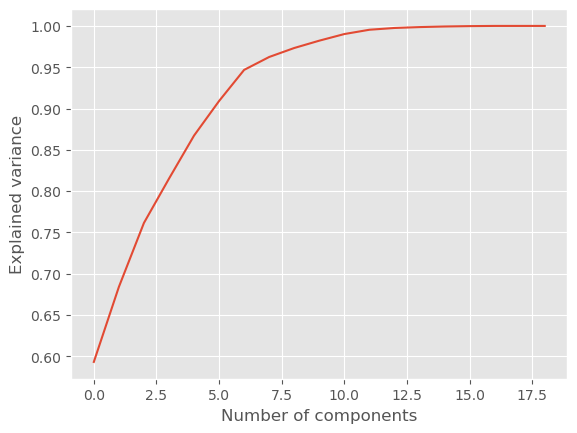

In [9]:
from sklearn.decomposition import PCA
plt.style.use('ggplot')

pca_19 = PCA(n_components=19, random_state=20)
pca_19.fit(standardized_features)

plt.plot(np.cumsum(pca_19.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()
plt.style.use('default')

In [18]:
pca = PCA(n_components=0.95)
pca.fit(standardized_features)
pca.n_components_

8

In [23]:
pca = PCA(n_components=0.99)
pca.fit(standardized_features)
pca.n_components_

11

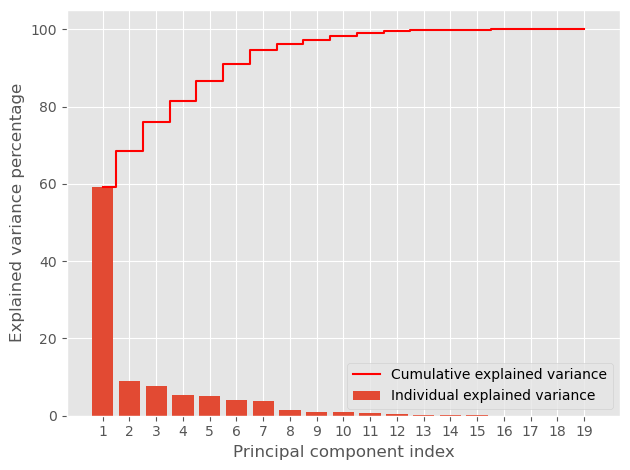

In [26]:
pca = PCA(n_components=None)
pca.fit(standardized_features)

exp_var = pca.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)

plt.style.use('ggplot')
plt.bar(range(1, 20), exp_var, align='center', label='Individual explained variance')
plt.step(range(1, 20), cum_exp_var, where='mid', label='Cumulative explained variance', color='red')

plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.xticks(ticks=range(1, 20))
plt.legend(loc='best')
plt.tight_layout()
plt.show()
plt.style.use('default')

Prema PCA, broj komponenti koje najbolje opisuju model je između 8 i 11, kako bi se zadržalo 95-99% varijanse.

In [10]:
pca_10 = PCA(n_components=10)
standardized_PCA = pca_10.fit_transform(standardized_features)
df_PCA = pd.DataFrame(standardized_PCA, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
df_PCA.head()

# --- "Selected" features' names: ---
# standardized_PCA

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.946426,0.222508,0.892022,-0.081964,2.099949,0.940354,0.966937,-0.349180,0.376883,-0.515805
1,-2.570753,0.770024,0.570306,-0.178733,1.830064,0.927701,0.979548,0.182868,-0.097322,0.081149
2,-1.910346,0.109896,0.419617,0.141255,2.044078,0.817082,0.263276,-0.769625,-0.178905,-0.185890
3,-0.995155,0.037174,-0.126670,0.117600,1.792629,0.454482,0.312422,-1.440611,-0.294389,0.543009
4,-2.448706,0.398210,0.157312,0.176767,1.696479,0.763215,0.383917,-0.498341,-0.293133,0.297032


-----------

### 3.1 Isprobavanje algoritama linearne regresije

**LinearRegression**

In [4]:
from sklearn.linear_model import LinearRegression

features = potential_features     # fičeri koji se koriste za obučavanje ovog modela

ols = LinearRegression()
modelLinReg_motor_UPDRS = ols.fit(features, target_motor_UPDRS)
ols = LinearRegression()
modelLinReg_total_UPDRS = ols.fit(features, target_total_UPDRS)

prediction_motor_UPDRS = modelLinReg_motor_UPDRS.predict(features)
prediction_total_UPDRS = modelLinReg_total_UPDRS.predict(features)

scores['OLS_motor'] = modelLinReg_motor_UPDRS.score(features, target_motor_UPDRS)
scores['OLS_total'] = modelLinReg_total_UPDRS.score(features, target_total_UPDRS)
print('Score for motor_UPDRS: ', scores['OLS_motor'])
print('Score for total_UPDRS: ', scores['OLS_total'])

Score for motor_UPDRS:  0.15682169262949475
Score for total_UPDRS:  0.1765394982185371


Sa cross-validacijom:

In [8]:
from sklearn.model_selection import cross_val_score, KFold

features = potential_features     # fičeri koji se koriste za obučavanje ovog modela

ols = LinearRegression()
cv = KFold(n_splits=10, random_state=1, shuffle=True)

n_scores_motor = cross_val_score(ols, features, target_motor_UPDRS, scoring='r2', cv=cv, n_jobs=-1)
n_scores = cross_val_score(ols, features, target_total_UPDRS, scoring='r2', cv=cv, n_jobs=-1)
scores['OLS_cv_motor'] = np.mean(n_scores_motor)
scores['OLS_cv_total'] = np.mean(n_scores)

print('Score for motor_UPDRS: ', scores['OLS_cv_motor'])
print('Score for total_UPDRS: ', scores['OLS_cv_total'])

Score for motor_UPDRS:  0.14841702844947266
Score for total_UPDRS:  0.16982890664971606


------

**Ridge**

In [12]:
from sklearn.linear_model import RidgeCV

features = standardized_features     # fičeri koji se koriste za obučavanje ovog modela, mora standardizovani

ridgeCV = RidgeCV(alphas=[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0], scoring='r2')
modelRidgeCV_motor_UPDRS = ridgeCV.fit(features, target_motor_UPDRS)
ridgeCV = RidgeCV(alphas=[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0], scoring='r2')
modelRidgeCV_total_UPDRS = ridgeCV.fit(features, target_total_UPDRS)

prediction_motor_UPDRS = modelRidgeCV_motor_UPDRS.predict(features)
prediction_total_UPDRS = modelRidgeCV_total_UPDRS.predict(features)

scores['Ridge_motor'] = modelRidgeCV_motor_UPDRS.score(features, target_motor_UPDRS)
scores['Ridge_total'] = modelRidgeCV_total_UPDRS.score(features, target_total_UPDRS)

print('Score for motor_UPDRS: ', scores['Ridge_motor'])
print('Score for total_UPDRS: ', scores['Ridge_total'])
print('Value of hyperparameter alpha (motor): ', modelRidgeCV_motor_UPDRS.alpha_)
print('Value of hyperparameter alpha (total): ', modelRidgeCV_total_UPDRS.alpha_)

Score for motor_UPDRS:  0.15506178850191177
Score for total_UPDRS:  0.17542758266301273
Value of hyperparameter alpha (motor):  100.0
Value of hyperparameter alpha (total):  100.0


--------

**Lasso**

In [9]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

features = standardized_features     # fičeri koji se koriste za obučavanje ovog modela, mora standardizovani

parameters={"alpha":[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0]}
cv = KFold(n_splits=10, random_state=1, shuffle=True)

lasso = Lasso()
modelLasso_motor_UPDRS = lasso.fit(features, target_motor_UPDRS)
lasso = Lasso()
modelLasso_total_UPDRS = lasso.fit(features, target_total_UPDRS)

modelLasso_motor_UPDRS_gs = GridSearchCV(modelLasso_motor_UPDRS,
                                         param_grid=parameters,
                                         scoring='r2',
                                         cv=cv,
                                         verbose=1, 
                                         return_train_score=True)

modelLasso_motor_UPDRS = modelLasso_motor_UPDRS_gs.fit(features, target_motor_UPDRS)

modelLasso_total_UPDRS_gs = GridSearchCV(modelLasso_total_UPDRS,
                                         param_grid=parameters,
                                         scoring='r2',
                                         cv=cv,
                                         verbose=1, 
                                         return_train_score=True)

modelLasso_total_UPDRS = modelLasso_total_UPDRS_gs.fit(features, target_total_UPDRS)

scores['Lasso_motor'] = modelLasso_motor_UPDRS.best_score_
scores['Lasso_total'] = modelLasso_total_UPDRS.best_score_
print('Score for motor_UPDRS: ', scores['Lasso_motor'])
print('Score for total_UPDRS: ', scores['Lasso_total'])
print('Value of hyperparameter alpha (motor): ', modelLasso_motor_UPDRS.best_params_)
print('Value of hyperparameter alpha (total): ', modelLasso_total_UPDRS.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Score for motor_UPDRS:  0.13877134825062357
Score for total_UPDRS:  0.16492852055761986
Value of hyperparameter alpha (motor):  {'alpha': 0.1}
Value of hyperparameter alpha (total):  {'alpha': 0.1}


---------

**ElasticNet**

In [10]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

features = standardized_features     # fičeri koji se koriste za obučavanje ovog modela, mora standardizovani

parameters={"alpha":[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0]}
cv = KFold(n_splits=10, random_state=1, shuffle=True)

elasticNet = ElasticNet()    
modelElasticNet_motor_UPDRS = elasticNet.fit(features, target_motor_UPDRS)
elasticNet = ElasticNet() 
modelElasticNet_total_UPDRS = elasticNet.fit(features, target_total_UPDRS)

modelElasticNet_motor_UPDRS_gs = GridSearchCV(modelElasticNet_motor_UPDRS,
                                         param_grid=parameters,
                                         scoring='r2',
                                         cv=cv,
                                         verbose=1, 
                                         return_train_score=True)

modelElasticNet_motor_UPDRS = modelElasticNet_motor_UPDRS_gs.fit(features, target_motor_UPDRS)

modelElasticNet_total_UPDRS_gs = GridSearchCV(modelElasticNet_total_UPDRS,
                                         param_grid=parameters,
                                         scoring='r2',
                                         cv=cv,
                                         verbose=1, 
                                         return_train_score=True)

modelElasticNet_total_UPDRS = modelElasticNet_total_UPDRS_gs.fit(features, target_total_UPDRS)

scores['ElasticNet_motor'] = modelElasticNet_motor_UPDRS.best_score_
scores['ElasticNet_total'] = modelElasticNet_total_UPDRS.best_score_
print('Score for motor_UPDRS: ', scores['ElasticNet_motor'])
print('Score for total_UPDRS: ', scores['ElasticNet_total'])
print('Value of hyperparameter alpha (motor): ', modelElasticNet_motor_UPDRS.best_params_)
print('Value of hyperparameter alpha (total): ', modelElasticNet_total_UPDRS.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Score for motor_UPDRS:  0.14242115128260183
Score for total_UPDRS:  0.16613868890312827
Value of hyperparameter alpha (motor):  {'alpha': 0.1}
Value of hyperparameter alpha (total):  {'alpha': 0.1}


--------

**SVR (linear kernel)**

In [13]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

features = standardized_features     # fičeri koji se koriste za obučavanje ovog modela

regr_motor_UPDRS = SVR(C=1.0, epsilon=0.2, kernel='linear')
model_motor_UPDRS = regr_motor_UPDRS.fit(features, target_motor_UPDRS)
regr_total_UPDRS = SVR(C=1.0, epsilon=0.2, kernel='linear')
model_total_UPDRS = regr_total_UPDRS.fit(features, target_total_UPDRS)

scores['SVR_motor'] = model_motor_UPDRS.score(features, target_motor_UPDRS)
scores['SVR_total'] = model_total_UPDRS.score(features, target_total_UPDRS)
print('Score for motor_UPDRS: ', scores['SVR_motor'])
print('Score for total_UPDRS: ', scores['SVR_total'])

Score for motor_UPDRS:  0.11698080174262249
Score for total_UPDRS:  0.1471242132786289


------------

**SGDRegressor**

In [14]:
from sklearn.linear_model import SGDRegressor

features = standardized_features       # fičeri koji se koriste za obučavanje ovog modela

regr_motor_UPDRS = SGDRegressor(max_iter=1000, tol=1e-3)
model_motor_UPDRS = regr_motor_UPDRS.fit(features, target_motor_UPDRS)
regr_total_UPDRS = SGDRegressor(max_iter=1000, tol=1e-3)
model_total_UPDRS = regr_total_UPDRS.fit(features, target_total_UPDRS)

prediction_motor_UPDRS = model_motor_UPDRS.predict(features)
prediction_total_UPDRS = model_total_UPDRS.predict(features)

scores['SGDRegressor_motor'] = model_motor_UPDRS.score(features, target_motor_UPDRS)
scores['SGDRegressor_total'] = model_total_UPDRS.score(features, target_total_UPDRS)
print('Score for motor_UPDRS: ', scores['SGDRegressor_motor'])
print('Score for total_UPDRS: ', scores['SGDRegressor_total'])

Score for motor_UPDRS:  0.1519877753728377
Score for total_UPDRS:  0.17490536668152357


----------------

In [15]:
from tabulate import tabulate

table = [[''],['motor_UPDRS'],['total_UPDRS']]

for algorithm in scores:
    if algorithm[:-6] not in table[0]:
        table[0].append(algorithm[:-6])
        table[1].append(0)
        table[2].append(0)
    col_index = table[0].index(algorithm[:-6])
    if algorithm[-5:]=='motor':
        table[1][col_index] = scores[algorithm]
    else:
        table[2][col_index] = scores[algorithm]
        
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒═════════════╤══════════╤══════════╤══════════╤══════════════╤══════════╤══════════╤════════════════╕
│             │      OLS │   OLS_cv │    Lasso │   ElasticNet │    Ridge │      SVR │   SGDRegressor │
╞═════════════╪══════════╪══════════╪══════════╪══════════════╪══════════╪══════════╪════════════════╡
│ motor_UPDRS │ 0.156822 │ 0.148417 │ 0.138771 │     0.142421 │ 0.155062 │ 0.116981 │       0.151988 │
├─────────────┼──────────┼──────────┼──────────┼──────────────┼──────────┼──────────┼────────────────┤
│ total_UPDRS │ 0.176539 │ 0.169829 │ 0.164929 │     0.166139 │ 0.175428 │ 0.147124 │       0.174905 │
╘═════════════╧══════════╧══════════╧══════════╧══════════════╧══════════╧══════════╧════════════════╛


Može se zaključiti da su linearni modeli dali jako loše rezultate, te je zato potrebno ispitati nelinearne metode.

---------

### 3.2 Isprobavanje nelinearnih metoda

In [16]:
scores_nonlinear = {}

**SVR (kernel='rbf'/'sigmoid')**

In [17]:
from sklearn.svm import SVR

features = standardized_features     

parameters = {'kernel' : ['rbf', 'sigmoid'],
         'C' : [1,5,10,100,1000],
         'degree' : [3,8],
         'coef0' : [0.01,10,0.5],
         'gamma' : ['auto','scale']}
cv = KFold(n_splits=10, random_state=1, shuffle=True)

regr_motor_UPDRS = SVR()
model_motor_UPDRS = regr_motor_UPDRS.fit(features, target_motor_UPDRS)

model_motor_UPDRS_gs = GridSearchCV(model_motor_UPDRS,
                                         param_grid=parameters,
                                         scoring='r2',
                                         cv=cv,
                                         verbose=1, 
                                         n_jobs=-1,
                                         return_train_score=True)

model_motor_UPDRS = model_motor_UPDRS_gs.fit(features, target_motor_UPDRS)

scores_nonlinear['SVR_nl_motor'] = model_motor_UPDRS.best_score_
print('Score for motor_UPDRS: ', scores_nonlinear['SVR_nl_motor'])
print('Value of hyperparameters: ', model_motor_UPDRS.best_params_)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
Score for motor_UPDRS:  0.6654796484639232
Value of hyperparameters:  {'C': 1000, 'coef0': 0.01, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}


-------------

**Decision Tree Regressor**

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

features = standardized_features     

parameters={"splitter":["best"],
            "max_depth" : [1,3,5,7,9,11,12,13,15,17,18,19, None],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.0,0.1,0.2,0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
cv = KFold(n_splits=10, random_state=1, shuffle=True)

regr = DecisionTreeRegressor()
model = regr.fit(features, target)

model_gs = GridSearchCV(model,
                        param_grid=parameters,
                        scoring='r2',
                        cv=cv,
                        n_jobs=-1,
                        verbose=1)

model = model_gs.fit(features, target)

scores_nonlinear['DecisionTree_both'] = model.best_score_
print('Score: ', scores_nonlinear['DecisionTree_both'])
print('Value of hyperparameters: ', model.best_params_)

Fitting 10 folds for each of 31200 candidates, totalling 312000 fits
Score:  0.9600315558133385
Value of hyperparameters:  {'max_depth': 17, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'}


---------

**Random Forest Regressor**

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

features = standardized_features     

parameters={'max_depth': [5,7,9,11,12,13,15,17,18,19],
            'max_features': ['sqrt', 1.0],
            'n_estimators': [50, 100, 200, 500, 700] }
cv = KFold(n_splits=10, random_state=1, shuffle=True)

regr = RandomForestRegressor()
model = regr.fit(features, target)

model_gs = GridSearchCV(model,
                        param_grid=parameters,
                        scoring='r2',
                        cv=cv,
                        n_jobs=-1,
                        verbose=1)

model = model_gs.fit(features, target)

scores_nonlinear['RandomForest_both'] = model.best_score_
print('Score: ', scores_nonlinear['RandomForest_both'])
print('Value of hyperparameters: ', model.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Score:  0.9785796131838213
Value of hyperparameters:  {'max_depth': 19, 'max_features': 1.0, 'n_estimators': 700}


-------

**K Neighbors Regressor**

In [42]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

features = standardized_features     

parameters={'n_neighbors': [1,2,3,4,5,7,9,11,13],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'] }
cv = KFold(n_splits=10, random_state=1, shuffle=True)

regr_KNR = KNeighborsRegressor()
model_KNR = regr_KNR.fit(features, target)

model_KNR_gs = GridSearchCV(model_KNR,
                        param_grid=parameters,
                        scoring='r2',
                        cv=cv,
                        n_jobs=-1,
                        verbose=1)

model_KNR = model_KNR_gs.fit(features, target)

scores_nonlinear['KNeighbors_both'] = model_KNR.best_score_
print('Score: ', scores_nonlinear['KNeighbors_both'])
print('Value of hyperparameters: ', model_KNR.best_params_)

Fitting 10 folds for each of 72 candidates, totalling 720 fits
Score:  0.6859658616473732
Value of hyperparameters:  {'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'distance'}


------

In [43]:
from tabulate import tabulate

table = [[''],['motor_UPDRS'],['total_UPDRS'],['both']]

for algorithm in scores_nonlinear:
    if algorithm.rsplit('_',1)[0] not in table[0]:
        table[0].append(algorithm.rsplit('_',1)[0])
        table[1].append('-')
        table[2].append('-')
        table[3].append('-')
    col_index = table[0].index(algorithm.rsplit('_',1)[0])
    if algorithm[-5:]=='motor':
        table[1][col_index] = scores_nonlinear[algorithm]
    elif algorithm[-5:]=='total':
        table[2][col_index] = scores_nonlinear[algorithm]
    else:
        table[3][col_index] = scores_nonlinear[algorithm]
        
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒═════════════╤════════════════════╤════════════════════╤════════════════════╤════════════════════╕
│             │ SVR_nl             │ DecisionTree       │ RandomForest       │ KNeighbors         │
╞═════════════╪════════════════════╪════════════════════╪════════════════════╪════════════════════╡
│ motor_UPDRS │ 0.6654796484639232 │ 0.9324656672672977 │ -                  │ -                  │
├─────────────┼────────────────────┼────────────────────┼────────────────────┼────────────────────┤
│ total_UPDRS │ -                  │ -                  │ -                  │ -                  │
├─────────────┼────────────────────┼────────────────────┼────────────────────┼────────────────────┤
│ both        │ -                  │ 0.9600315558133385 │ 0.9785796131838213 │ 0.6859658616473732 │
╘═════════════╧════════════════════╧════════════════════╧════════════════════╧════════════════════╛


Može se zaključiti da su ovi modeli daleko bolji od linearnih. Nakon podešavanja hiperparametara i poređenja rezultata, kao najbolji model izabran je *RandomForestRegressor* sa vrednošću *r2* 0.98. Kako bi se dodatno poboljšala tačnost predviđanja UPDRS pacijenta, potrebno je analizirati da li selekcija bitnijih feature-a pozitivno utiče na performanse i tačnost modela.

-------------

## 4. Redukcija dimenzionalnosti

In [3]:
model_performance = {}

Prethodno dobijeni optimalni model:

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_validate

features = standardized_features
scoring = {'r2': 'r2',
           'rmse': 'neg_root_mean_squared_error',
           'mae': 'neg_mean_absolute_error'}
     
cv = KFold(n_splits=10, random_state=1, shuffle=True)

RF_regressor = RandomForestRegressor(max_depth=19, n_estimators=700, random_state=40)
n_scores_RF = cross_validate(RF_regressor, features, target, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=True)

model_performance['RFR_all_r2(train)'] = np.mean(n_scores_RF['train_r2'])
model_performance['RFR_all_r2(test)'] = np.mean(n_scores_RF['test_r2'])
model_performance['RFR_all_rmse(train)'] = np.mean(n_scores_RF['train_rmse'])
model_performance['RFR_all_rmse(test)'] = np.mean(n_scores_RF['test_rmse'])
model_performance['RFR_all_mae(train)'] = np.mean(n_scores_RF['train_mae'])
model_performance['RFR_all_mae(test)'] = np.mean(n_scores_RF['test_mae'])
print('Score train: ', model_performance['RFR_all_r2(train)'])
print('Score test: ', model_performance['RFR_all_r2(test)'])
print('RMSE train: ', model_performance['RFR_all_rmse(train)'])
print('RMSE test: ', model_performance['RFR_all_rmse(test)'])
print('MAE train: ', model_performance['RFR_all_mae(train)'])
print('MAE test: ', model_performance['RFR_all_mae(test)'])

Score train:  0.9970263337550593
Score test:  0.9782931357465767
RMSE train:  -0.5140857550154329
RMSE test:  -1.3777755667672644
MAE train:  -0.20740582181756456
MAE test:  -0.5586183184944946


**Feature Importance**

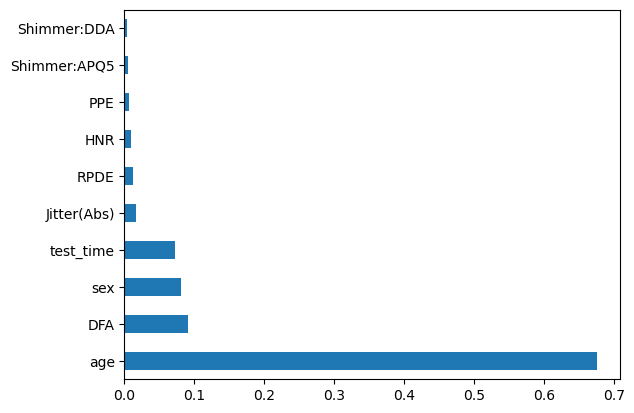

In [5]:
model = RF_regressor.fit(features, target)

column_names = dataframe.drop(['subject#', 'motor_UPDRS', 'total_UPDRS'], axis=1).columns.to_numpy()

feat_importances = pd.Series(model.feature_importances_, index=column_names)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

**RFE (Recursive Feature Elimination)**

In [11]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=10, random_state=1, shuffle=True)

features=standardized_features
rfr = RandomForestRegressor()
rfe = RFE(estimator=rfr, step=1)
rfs = RandomForestRegressor()
pipe = Pipeline(steps=[("rfe", rfe), ("rfs", rfs)])


parameters={'rfe__n_features_to_select': [7, 8, 9, 10, 11],
            'rfs__max_depth': [5,7,9,10,11,12,13],
            'rfs__n_estimators': [50, 100, 200, 500] }

model_RFE_GS = GridSearchCV(pipe,
                        param_grid=parameters,
                        scoring='r2',
                        cv=cv,
                        n_jobs=-1,
                        verbose=1)
model_RFE=model_RFE_GS.fit(features, target)
rfe = model_RFE.best_estimator_['rfe']
print("Best parameter (CV score=%0.3f):" % model_RFE.best_score_)
print(model_RFE.best_params_)


Fitting 10 folds for each of 140 candidates, totalling 1400 fits
Best parameter (CV score=0.975):
{'rfe__n_features_to_select': 7, 'rfs__max_depth': 13, 'rfs__n_estimators': 500}


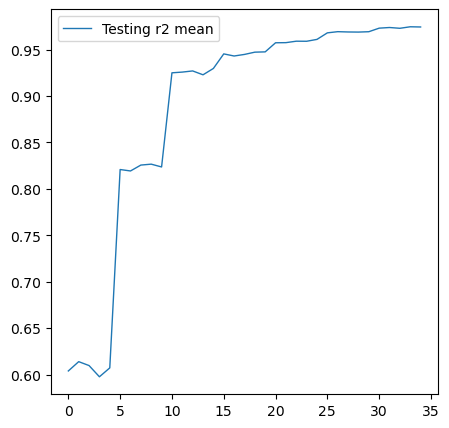

In [18]:
fig = plt.figure(figsize=(5,5))
means_test = []
for k in range(0,7):
    i=0
    while(i<len(model_RFE.cv_results_['mean_test_score'])):
        means_test.append(model_RFE.cv_results_['mean_test_score'][i+4*k])
        i+=28
plt.plot(range(0,len(means_test)), means_test, lw=1, label = 'Testing r2 mean')
plt.legend()
plt.show()

Na dijagramu je prikazana promena r2 score-a tokom iteracija u kojima se menjaju različite kombinacije broja feature-a i maksimalne dubine. Može se zaključiti da je najbolja maksimalna dubina 10, jer nakon nje počinje stagnacija testing krive, odnosno *overfitting* modela. Takođe, broj feature-a ne utiče na poboljšanje r2 score-a.

In [24]:
for i, c in enumerate(column_names):
    print(rfe.ranking_[i], '\t', c)

1 	 age
1 	 sex
1 	 test_time
11 	 Jitter(%)
1 	 Jitter(Abs)
12 	 Jitter:RAP
13 	 Jitter:PPQ5
4 	 Jitter:DDP
7 	 Shimmer
10 	 Shimmer(dB)
8 	 Shimmer:APQ3
5 	 Shimmer:APQ5
6 	 Shimmer:APQ11
1 	 Shimmer:DDA
9 	 NHR
2 	 HNR
1 	 RPDE
1 	 DFA
3 	 PPE


Sedam feature-a čiji je ranking jednako 1 su selektovani kao najbitniji.

In [30]:
features = dataframe.drop(['subject#', 'motor_UPDRS', 'total_UPDRS',
                           'Jitter(%)','Jitter:RAP','Jitter:PPQ5','Jitter:DDP',
                           'Shimmer','Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','Shimmer:APQ11',
                           'NHR','HNR','PPE'], axis=1).to_numpy()
scaler = StandardScaler()
standardized = scaler.fit_transform(features)
features = standardized

scoring = {'r2': 'r2',
           'rmse': 'neg_root_mean_squared_error',
           'mae': 'neg_mean_absolute_error'}
     
cv = KFold(n_splits=10, random_state=1, shuffle=True)

RFR_RFE = RandomForestRegressor(max_depth=10, n_estimators=500, random_state=40)
n_scores_RF_RFE = cross_validate(RFR_RFE, features, target, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=True)

model_performance['RFR_RFE_r2(train)'] = np.mean(n_scores_RF_RFE['train_r2'])
model_performance['RFR_RFE_r2(test)'] = np.mean(n_scores_RF_RFE['test_r2'])
model_performance['RFR_RFE_rmse(train)'] = np.mean(n_scores_RF_RFE['train_rmse'])
model_performance['RFR_RFE_rmse(test)'] = np.mean(n_scores_RF_RFE['test_rmse'])
model_performance['RFR_RFE_mae(train)'] = np.mean(n_scores_RF_RFE['train_mae'])
model_performance['RFR_RFE_mae(test)'] = np.mean(n_scores_RF_RFE['test_mae'])
print('Score train: ', model_performance['RFR_RFE_r2(train)'])
print('Score test: ', model_performance['RFR_RFE_r2(test)'])
print('RMSE train: ', model_performance['RFR_RFE_rmse(train)'])
print('RMSE test: ', model_performance['RFR_RFE_rmse(test)'])
print('MAE train: ', model_performance['RFR_RFE_mae(train)'])
print('MAE test: ', model_performance['RFR_RFE_mae(test)'])

Score train:  0.9578785980754286
Score test:  0.9435724474703964
RMSE train:  -1.9153048494825797
RMSE test:  -2.2193219439648777
MAE train:  -1.0133743576471037
MAE test:  -1.1852876576223264


**PCA**

Broj komponenata (pca__n_components) odabran je na osnovu PCA krive kreirane u poglavlju 3.

In [5]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=10, random_state=1, shuffle=True)

features=potential_features
pca = PCA()
scaler = StandardScaler()
rfs = RandomForestRegressor()
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("rfs", rfs)])

parameters={'pca__n_components': [7, 8, 9, 10, 11],
            'rfs__max_depth': [5,7,9,11,12,13,15,17,18,19],
            'rfs__max_features': ['sqrt', 1.0],
            'rfs__n_estimators': [50, 100, 200, 500, 700] }

search = GridSearchCV(pipe,
                        param_grid=parameters,
                        scoring='r2',
                        cv=cv,
                        n_jobs=-1,
                        verbose=1)
search.fit(features, target_motor_UPDRS)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)



Fitting 10 folds for each of 500 candidates, totalling 5000 fits
Best parameter (CV score=0.646):
{'pca__n_components': 7, 'rfs__max_depth': 19, 'rfs__max_features': 1.0, 'rfs__n_estimators': 700}


Može se zaključiti da selekcija fičera korišćenjem PCA daje jako loše rezultate.

In [31]:
from tabulate import tabulate

table = [[''],['r2(train)'],['r2(test)'],['rmse(train)'],['rmse(test)'],['mae(train)'],['mae(test)']]

for algorithm in model_performance:
    if algorithm.rsplit('_',1)[0] not in table[0]:
        table[0].append(algorithm.rsplit('_',1)[0])
        table[1].append('-')
        table[2].append('-')
        table[3].append('-')
        table[4].append('-')
        table[5].append('-')
        table[6].append('-')
    col_index = table[0].index(algorithm.rsplit('_',1)[0])
    for i in range(6):
        if algorithm.rsplit('_',1)[1] == table[i+1][0]:
            table[i+1][col_index] = model_performance[algorithm]
            break

print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒═════════════╤═══════════╤═══════════╕
│             │   RFR_all │   RFR_RFE │
╞═════════════╪═══════════╪═══════════╡
│ r2(train)   │  0.997026 │  0.957879 │
├─────────────┼───────────┼───────────┤
│ r2(test)    │  0.978293 │  0.943572 │
├─────────────┼───────────┼───────────┤
│ rmse(train) │ -0.514086 │ -1.9153   │
├─────────────┼───────────┼───────────┤
│ rmse(test)  │ -1.37778  │ -2.21932  │
├─────────────┼───────────┼───────────┤
│ mae(train)  │ -0.207406 │ -1.01337  │
├─────────────┼───────────┼───────────┤
│ mae(test)   │ -0.558618 │ -1.18529  │
╘═════════════╧═══════════╧═══════════╛


## 5. Zaključak

Na osnovu tabele iznad, može se zaključiti da je najbolji (najprecizniji **i** najoptimalniji) model Random Forest Regressor koji je obučavan na feature-ima selektovanim Recursive Feature Elimination metodom uz hiperparametre dobijene Grid Search Cross Validation algoritmom, sa r2 score-om od gotovo 0.95. Iako isti taj model sa više feature-a daje bolji r2 score, on koristi skoro troduplo više feature-a. Razlika između svih score-ova nije toliko velika, tako da zarad boljih performansi, odabran je model sa redukovanim brojem feature-a.